<h2 style='text-align: center;'> <font color='Green'><u>Case Study on Regression</u></font> </h2>

The given dataset contains price of second-hand Hyundai grand i10 car with 
respect to year of making. Find the best linear relationship between year and 
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better

<h3 style='text-align: right;'> Submitted By:<font color='BLUE'>ATHIRA PRAKASH </font></h3>

### Import the necessary libraries.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score

### Read the data into a Pandas DataFrame.

In [2]:
data = pd.read_csv(r"D:\DSA\data\car_age_price.csv")

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


### Explore the data

In [4]:
data.head()
#This will show you the first five rows of the data.

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
data.shape

(112, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Check Missing Values

In [9]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

### Check Duplicates

In [17]:
data.duplicated().sum()

54

In [18]:
data=data.drop_duplicates()

In [19]:
data.shape

(58, 2)

### Outliers checking

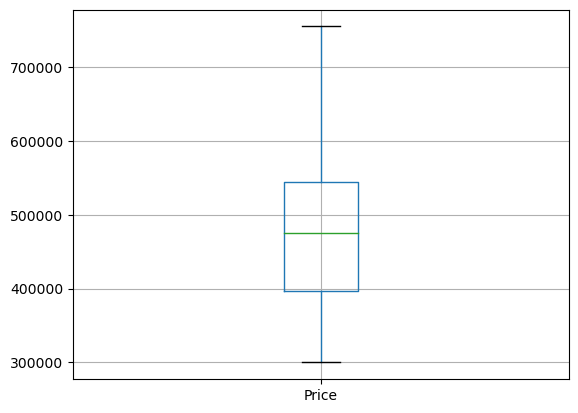

In [36]:
data.boxplot('Price')
plt.show()

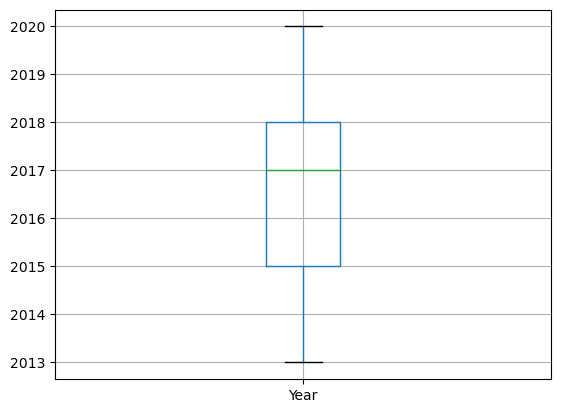

In [38]:
data.boxplot('Year')
plt.show()

### Split the data into training and test sets

In [20]:
X=data.drop('Price',axis=1)
y=data['Price']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train,X_test

(     Year
 68   2015
 60   2015
 11   2018
 38   2018
 8    2017
 6    2016
 77   2015
 40   2019
 59   2016
 98   2020
 99   2020
 107  2016
 34   2017
 12   2017
 54   2017
 52   2013
 37   2017
 49   2018
 63   2017
 108  2014
 73   2013
 14   2017
 61   2017
 109  2015
 80   2015
 58   2014
 104  2014
 1    2019
 43   2019
 2    2019
 83   2017
 71   2017
 67   2015
 48   2016
 86   2017
 13   2019
 45   2018
 39   2020
 110  2016
 42   2018
 10   2019
 78   2015
 30   2019
 56   2014
 100  2016
 70   2015,
      Year
 0    2018
 7    2017
 65   2017
 22   2015
 81   2014
 103  2017
 69   2015
 50   2013
 85   2015
 17   2017
 97   2020
 5    2015)

In [24]:
y_train,y_test

(68     465000
 60     490000
 11     500000
 38     475000
 8      509999
 6      425000
 77     325000
 40     525000
 59     550000
 98     700000
 99     600000
 107    375000
 34     450000
 12     500000
 54     525000
 52     345000
 37     486000
 49     600000
 63     595000
 108    300000
 73     320000
 14     475000
 61     540000
 109    425000
 80     390000
 58     450000
 104    400000
 1      755000
 43     550000
 2      700000
 83     480000
 71     490000
 67     400000
 48     396000
 86     520000
 13     600000
 45     450000
 39     545000
 110    420000
 42     550000
 10     500000
 78     409999
 30     650000
 56     341000
 100    350000
 70     450000
 Name: Price, dtype: int64,
 0      465000
 7      575000
 65     495000
 22     434999
 81     390000
 103    375000
 69     300000
 50     325000
 85     320000
 17     550000
 97     640000
 5      350000
 Name: Price, dtype: int64)

### Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [45]:
#Create a linear regression model
lr_model = lr.fit(X_train, y_train)

In [46]:
# Predict the Price values for the test set using the linear regression model
y_pred_lin=lr_model.predict(X_test)

In [40]:
y_pred_lin,y_test

(array([541975.77419354, 498094.31397849, 498094.31397849, 410331.39354838,
        366449.93333334, 498094.31397849, 410331.39354838, 322568.47311828,
        410331.39354838, 498094.31397849, 629738.69462365, 410331.39354838]),
 0      465000
 7      575000
 65     495000
 22     434999
 81     390000
 103    375000
 69     300000
 50     325000
 85     320000
 17     550000
 97     640000
 5      350000
 Name: Price, dtype: int64)

In [47]:
# Calculate the error metrics for the linear regression model
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

In [44]:
# Print the error metrics
print('Linear Regression:')
print('RMSE:', rmse_lin)
print('R^2:', r2_lin)

Linear Regression:
RMSE: 67665.04315289702
R^2: 0.5952655854274035


### Lasso Regression Model

In [48]:
from sklearn.linear_model import Lasso

In [49]:
# Create a lasso model
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [50]:
# Predict the mpg values for the test set using the lasso model
y_pred_lasso = lasso.predict(X_test)

In [51]:
# Calculate the error metrics for the lasso model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

In [52]:
# Print the error metrics

print('Lasso Regression:')
print('RMSE:', rmse_lasso)
print('R^2:', r2_lasso)

Lasso Regression:
RMSE: 67665.13512102436
R^2: 0.5952644852229334


### INSIGHTS: The RMSE and R^2 values for both models are the same. This means that both models are equally good at fitting the data. Therefore, it is difficult to say which model is better at predicting the price of a 2022 model second-hand grand i10.

In [60]:
# Predict the price of a 2022 model second-hand grand i10 using the linear regression model
x_2022=pd.DataFrame({'Year':[2022]})
y_pred_lin = lr_model.predict(x_2022)

In [65]:
y_pred_lin=np.round(y_pred_lin,2)

In [73]:
print('Predicted price: using linear regression model is', '₹ ',y_pred_lin)

Predicted price: using linear regression model is ₹  [717501.62]


In [70]:
# Predict the price of a 2022 model second-hand grand i10 using the lasso regression model
x_2022=pd.DataFrame({'Year':[2022]})
y_pred_lasso = lasso.predict(x_2022)

In [71]:
y_pred_lasso=np.round(y_pred_lasso,2)

In [74]:
print('Predicted price: using lassoregression model is ', '₹ ',y_pred_lasso)

Predicted price: using lassoregression model is  ₹  [717500.11]
